In [47]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from heapq import nlargest
from transformers import pipeline
sns.set()

C:\Users\loptop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('stories.csv')
df.head()

,id,title,story
0,"1,The Last Starship,""In the year 3050, humanit...",NaN,NaN
1,"2,The Time Weaver,""Dr. Elara Voss, a brilliant...",NaN,NaN
2,"3,Echoes of Andromeda,""Astronomer Dr. Ravi Pat...",NaN,NaN
3,"4,The Quantum Librarian,""In the year 2200, the...",NaN,NaN
4,"5,The Celestial Voyager,""Captain Marcus Steele...",NaN,NaN


In [3]:
df['id'][0]

'1,The Last Starship,"In the year 3050, humanity’s last starship, *Endeavour*, sailed through the dark void of space. The once bustling Earth was now a distant memory, consumed by environmental collapse. The crew, led by Captain Aria Nelson, was on a mission to find a new home. One day, as the ship scanned distant star systems, an ancient alien signal emerged from a forgotten corner of the galaxy. The signal, a cryptic message, hinted at a star system with planets capable of supporting life. Excitement filled the crew as they set course for the coordinates. Upon arrival, they discovered a solar system with three habitable planets. The crew began detailed scans and found an ancient archive buried beneath the surface of the third planet. The archive contained records of a civilization that had mastered space travel but chose to leave the system millennia ago. As the crew decoded the messages, they learned that the alien race had left behind advanced terraforming technology and detailed i

In [4]:
df['id'][0].split('"')

['1,The Last Starship,',
 'In the year 3050, humanity’s last starship, *Endeavour*, sailed through the dark void of space. The once bustling Earth was now a distant memory, consumed by environmental collapse. The crew, led by Captain Aria Nelson, was on a mission to find a new home. One day, as the ship scanned distant star systems, an ancient alien signal emerged from a forgotten corner of the galaxy. The signal, a cryptic message, hinted at a star system with planets capable of supporting life. Excitement filled the crew as they set course for the coordinates. Upon arrival, they discovered a solar system with three habitable planets. The crew began detailed scans and found an ancient archive buried beneath the surface of the third planet. The archive contained records of a civilization that had mastered space travel but chose to leave the system millennia ago. As the crew decoded the messages, they learned that the alien race had left behind advanced terraforming technology and detai

In [5]:
df['id'][0].split('"')[1]

'In the year 3050, humanity’s last starship, *Endeavour*, sailed through the dark void of space. The once bustling Earth was now a distant memory, consumed by environmental collapse. The crew, led by Captain Aria Nelson, was on a mission to find a new home. One day, as the ship scanned distant star systems, an ancient alien signal emerged from a forgotten corner of the galaxy. The signal, a cryptic message, hinted at a star system with planets capable of supporting life. Excitement filled the crew as they set course for the coordinates. Upon arrival, they discovered a solar system with three habitable planets. The crew began detailed scans and found an ancient archive buried beneath the surface of the third planet. The archive contained records of a civilization that had mastered space travel but chose to leave the system millennia ago. As the crew decoded the messages, they learned that the alien race had left behind advanced terraforming technology and detailed instructions for creat

In [6]:
def story_extractor(text):
    return text.split('"')[1]

In [7]:
data = df['id'].apply(story_extractor)

In [8]:
data

0     In the year 3050, humanity’s last starship, *E...
1     Dr. Elara Voss, a brilliant physicist, had jus...
2     Astronomer Dr. Ravi Patel was thrilled when he...
3     In the year 2200, the Quantum Library was the ...
4     Captain Marcus Steele commanded the *Celestial...
5     In the distant future, interstellar travel had...
6     A team of cosmic architects was tasked with de...
7     The Celestials were an ancient alien race know...
8     A notorious group of space thieves, known as t...
9     In the year 2200, the Quantum Library was the ...
10    In the far future, humanity had mastered the a...
11    In a distant future, humanity had spread acros...
12    The Galactic Mapmakers were a group of explore...
13    In a future where music was a universal langua...
14    On a distant planet known as Starlight, a grou...
15    In the year 3100, humanity had developed the t...
16    On a remote world known as Gaia, scientists di...
17    In a futuristic society where time travel 

In [9]:
df_n = pd.DataFrame(data = data)
df_n.head()

,id
0,"In the year 3050, humanity’s last starship, *E..."
1,"Dr. Elara Voss, a brilliant physicist, had jus..."
2,Astronomer Dr. Ravi Patel was thrilled when he...
3,"In the year 2200, the Quantum Library was the ..."
4,Captain Marcus Steele commanded the *Celestial...


In [10]:
df_n['story'] = df_n['id']
df_n.drop(columns = ['id'], axis = 1, inplace = True)

In [11]:
df_n.head()

,story
0,"In the year 3050, humanity’s last starship, *E..."
1,"Dr. Elara Voss, a brilliant physicist, had jus..."
2,Astronomer Dr. Ravi Patel was thrilled when he...
3,"In the year 2200, the Quantum Library was the ..."
4,Captain Marcus Steele commanded the *Celestial...


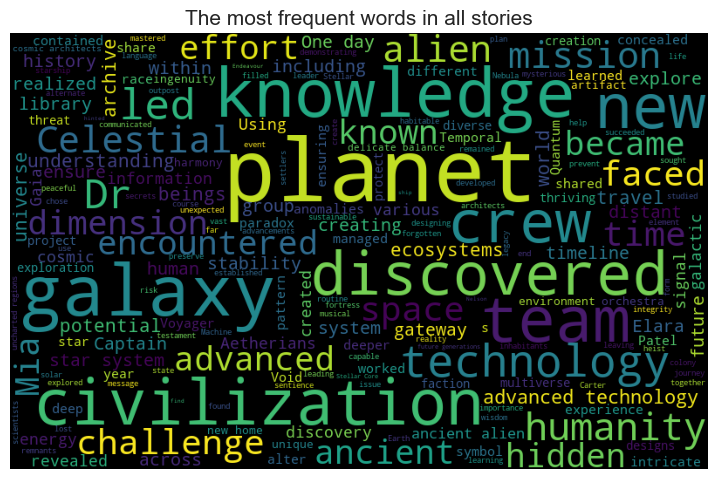

In [12]:
plt.figure(figsize = (9, 7))
all_sent = ' '.join([sentence for sentence in df_n['story']])
word_cloud = WordCloud(width = 800, height = 500, max_font_size = 100, random_state = 101).generate(all_sent)
plt.imshow(word_cloud)
plt.axis('off')
plt.title('The most frequent words in all stories', fontsize = 15)
plt.show()

In [13]:
nlp = spacy.load('en_core_web_sm')

In [14]:
sw = stopwords.words('english')

In [15]:
lemmatizer = WordNetLemmatizer()

In [16]:
def text_preprocessing(text):
    text = text.lower()
    text = re.sub('[^a-z]', ' ', text)
    text = re.sub('\s+[a-z]\s+', ' ', text)
    text = re.sub('\s+', ' ', text)
    words = [word for word in text.split() if word not in sw]
    words = [lemmatizer.lemmatize(word) for word in words]
    return words

In [17]:
def counting(words):
    word_freq = Counter(words)
    max_freq = max(word_freq.values())
    for word, freq in word_freq.items():
        word_freq[word] = freq / max_freq
    return word_freq

In [32]:
def sentence_score(text, word_freq):
    sents_score = dict()
    doc = nlp(text)
    sentences = [sentence.text for sentence in doc.sents]
    for sent in sentences:
        for token in sent.split():
            if token in word_freq.keys():
                if sent not in sents_score.keys():
                    sents_score[sent] = word_freq[token]
                else:
                    sents_score[sent] += word_freq[token]
    return sents_score, sentences

In [38]:
def n_largest_sentences(sents_score, sentences):
    freq_sents = nlargest(3, sents_score, key = sents_score.get)
    fin_le = []
    for i in sentences:
        for j in freq_sents:
            if i == j:
                fin_le.append(i)
    return ' '.join(fin_le)

In [39]:
def text_summarization(text):
    words = text_preprocessing(text)
    word_freq = counting(words)
    sents_score, sentences = sentence_score(text, word_freq)
    freq_sents = nlargest(3, sents_score, key = sents_score.get)
    summarized_text = n_largest_sentences(sents_score, sentences)
    return summarized_text

In [40]:
df_n['summarized_story'] = df_n['story'].apply(text_summarization)

In [41]:
df_n.head()

,story,summarized_story
0,"In the year 3050, humanity’s last starship, *E...",The crew began detailed scans and found an anc...
1,"Dr. Elara Voss, a brilliant physicist, had jus...",This machine could alter time on a minuscule s...
2,Astronomer Dr. Ravi Patel was thrilled when he...,"The signal, a complex pattern of electromagnet..."
3,"In the year 2200, the Quantum Library was the ...",Curiosity led her to a concealed section conta...
4,Captain Marcus Steele commanded the *Celestial...,"As the crew investigated, they discovered that..."


In [42]:
df_n['story'][0]

'In the year 3050, humanity’s last starship, *Endeavour*, sailed through the dark void of space. The once bustling Earth was now a distant memory, consumed by environmental collapse. The crew, led by Captain Aria Nelson, was on a mission to find a new home. One day, as the ship scanned distant star systems, an ancient alien signal emerged from a forgotten corner of the galaxy. The signal, a cryptic message, hinted at a star system with planets capable of supporting life. Excitement filled the crew as they set course for the coordinates. Upon arrival, they discovered a solar system with three habitable planets. The crew began detailed scans and found an ancient archive buried beneath the surface of the third planet. The archive contained records of a civilization that had mastered space travel but chose to leave the system millennia ago. As the crew decoded the messages, they learned that the alien race had left behind advanced terraforming technology and detailed instructions for creat

In [43]:
df_n['summarized_story'][0]

'The crew began detailed scans and found an ancient archive buried beneath the surface of the third planet. As the crew decoded the messages, they learned that the alien race had left behind advanced terraforming technology and detailed instructions for creating a new home. Humanity had found a new home and was prepared to face the challenges ahead, thanks to the legacy of an ancient alien civilization.'

In [44]:
df_n['story'][1]

'Dr. Elara Voss, a brilliant physicist, had just completed her greatest invention: the Temporal Manipulator. This machine could alter time on a minuscule scale, affecting events within a small temporal window. Elara was excited to test her invention, eager to see its potential. During her first experiment, she made a minor adjustment to a single event. To her dismay, the results were far from what she expected. The minor change caused significant ripples, creating inconsistencies in the timeline. Historical records began to shift, and reality itself started to unravel. Elara realized that her experiment had inadvertently created a paradox. Desperate to fix the timeline, she sought the help of her assistant, Tom. Together, they analyzed the anomalies and discovered a more troubling issue: an alternate version of Elara from a different timeline was also trying to correct the paradox. Meeting her alternate self was both enlightening and disconcerting. The two Elaras had different approach

In [45]:
df_n['summarized_story'][1]

'This machine could alter time on a minuscule scale, affecting events within a small temporal window. Together, they analyzed the anomalies and discovered a more troubling issue: an alternate version of Elara from a different timeline was also trying to correct the paradox. Elara and her alternate self parted ways, their shared experience leaving them with a deeper understanding of time and the delicate balance required to maintain it.'